Кобзарь О.С. Хабибуллин Р.А. 

# Термодинамические свойства флюидов

Источники:

1. Юдин В. А. и др. Теплоемкость и теплопроводность пород и флюидов баженовской свиты-исходные данные для численного моделирования тепловых способов разработки/.; Федер. науч. центр-Науч.-исслед. ин-т систем. исслед. Рос. акад. наук //Москва: НИИСИ. – 2015.

2. Das D. K., Nerella S., Kulkarni D. Thermal properties of petroleum and gas-to-liquid products //Petroleum science and technology. – 2007. – Т. 25. – №. 4. – С. 415-425.

3. Closmann P. J. et al. A correlation of viscosity and molecular weight //Journal of Canadian Petroleum Technology. – 1990. – Т. 29. – №. 04.

4. https://petrowiki.org/Crude_oil_characterization

5. Riazi M. R., Daubert T. E. Characterization parameters for petroleum fractions //Industrial & engineering chemistry research. – 1987. – Т. 26. – №. 4. – С. 755-759.

6. Tovar L. P. et al. Overview and computational approach for studying the physicochemical characterization of high-boiling-point petroleum fractions (350 C+) //Oil & Gas Science and Technology–Revue d’IFP Energies nouvelles. – 2012. – Т. 67. – №. 3. – С. 451-477.

7. Brill J. P., Mukherjee H. K. Multiphase flow in wells. – Society of Petroleum Engineers, 1999. – Т. 17. Page 122

8. https://www.petroskills.com/blog/entry/crude-oil-and-changing-temperature#.XQkEnogzaM8

9. https://www.jmcampbell.com/tip-of-the-month/2009/07/variation-of-natural-gas-heat-capacity-with-temperature-pressure-and-relative-density/

10. https://syeilendrapramuditya.wordpress.com/2011/08/20/water-thermodynamic-properties/

11. Lateef A. K. et al. Specific Heat Capacity of Natural Gas; Expressed as a Function of Its Specific Gravity and Temperature //Nigeria Annual International Conference and Exhibition. – Society of Petroleum Engineers, 2011.


## Теплоемкость

В основном определение термодинамических свойств флюидов основывается на результатах лабораторных исследований. Ввиду того, что состав нефтей, газов, сильно варьируется от одного месторождения к другому, существует сильная неопределенность при применении корреляций. Кроме того, обычно свойства при изменении термобарических условий не меняются кардинально.  Поэтому в первом приближении теплоемкости флюидов можно принять следующими

$$C_{po} = 2100$$

$$C_{pw} = 4200$$

$$C_{pg} = 2100$$

где $C_p$ изобарная теплоемкость измеряемая в $\frac{Дж}{кг ^{\circ} K}$

Стоит также отметить, что теплоемкость является аддитивной величиной. 

Теплоемкость воды зависит от ее солености.

Теплоемкость разгазированной нефти слабо зависит от давления.

### Теплоемкость нефти

Коррелция Gambill [7]: 

$$ C_{po} = \frac{0.388 + 0.00045 T}{\gamma_o^{1/2}} $$

где: $T$ в Фаренгейтах, а $\gamma_o$ в API, а теплоемость в попугаях

Корреляция Wes Wright [8]:

$$ C_{po} = (2 * 10^{-3} * T - 1.429) * SG + (2.67 * 10^{-3})*T + 3.049) $$

где T в C, а теплоемкость в $\frac{кДж}{кг * С}$

### Теплоемкость газа

Корреляция Dr. Mahmood Moshfeghian [9]:

$$ C_{pg} = [ab^T T^c + de^P P^f] (\frac{SG}{0.60})^{0.025}$$

где $C_{pg}$ в кДж /кгС, P в МПа, T в С, SG для газа, т.е. $\gamma_g$

а коэффициенты:

| Коэффициент   | Значение | 
| :-------------: |:--:| 
| a     | 0.9     
| b   |  1.014   |
| c  |  -0.7    |
| d     | 2.170     
| e   |  1.015   |
| f  | 0.0214    |

### Теплоемкость воды 

Данные корреляции получены на основании лабораторный исследований, проведенных International Association for Properties of Water and Steam и допустимы при следующих условиях: 

$$p = 1 bar$$

$$ 5 C \leq T \leq 95 C$$

Корреляция, при температуре в С [10]:

$$C_{pw} = 4.214 - 2.286*10^3 * T + 
               4.991 * 10^{-5} * T ^ 2 - 
               4.519 * 10^{-7} * T ^ 3  + 
               1.857 * 10^{-9} * T ^ 4$$

### Теплоемкость газа 

Теплоемкость газа принята равной теплоемкости метана


## Теплопроводность

### Теплопроводность нефти 

В диапазоне температур $ 273 < T < 423 K$ могут быть применена корреляция Cragoe [2]:

$$k_o = 0.118 * \rho ^{-1} [1 - 0.00054(T-273)] * 10^3$$
и Smith [2]:
$$k_o = 0.137 * \rho ^{-1} [1 - 0.00054(T-273)] * 10^3$$
где: 

$k_o$ - теплопроводность, $\frac{W}{m K}$

$\rho$ -  плотность в кг / $м^3$ при 288 K

Корреляция Abdul-Seoud и Moharam [6]:

$$k_o = 2.540312 * (\frac{SG}{T})^{0.5} - 0.014485 $$

можно принять:

$$\frac{\rho_{288K}}{1000} = \gamma_o = SG$$

### Теплопроводность воды

По корреляции [10]

$$ k_w = 0.5636 + 1.946 * 10 ^{-3} * T - 
                8.151 * 10 ^{-6} *T ^ 2$$
                
при тех же ограничениях, что и при определение теплоемкости


## Коэффициент термического расширения 

### Коэффициент термического расширения для воды

При тех же самых ограничениях [10]:

$$ \beta_w = 7.957 * 10 ^{-5} + 7.315 * 10^{6} * T $$


## Псевдокомпозиционный подход

В источниках [3], [4], [5], [6] теплофизические свойства нефти могут быть вычислены с помощью характеристического фактора Ватсона $K_w$, предложенный для приблизительной характеристики УВ сырья (лежит в диапазоне от 10 до 12), молекулярную массу нефти $m_o$ и среднюю температуру начала кипения $T_b$

In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
import uniflocpy.uPVT.PVT_fluids as PVT_fluids
import uniflocpy.uTools.uconst as uc
%matplotlib inline

In [2]:
def show_example(legend, title, xlabel, ylabel):
    plt.grid(True)
    plt.title(title, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xlabel(xlabel, color='black')
    plt.legend(legend)
    plt.show()
    

In [3]:
fluid_Standing = PVT_fluids.FluidStanding()
p_bar = 1 
t_c = 60 
t_f = uc.c2f(t_c)
fluid_Standing.calc(p_bar, t_c)
gamma_oil = 0.8
gamma_gas = 0.6
api = uc.gamma_oil2api(gamma_oil)

In [4]:
def heat_capacity_oil_Gambill(gamma_oil, t_c):
    t_f = uc.c2f(t_c)
    api = uc.gamma_oil2api(gamma_oil)
    return ((0.388 + 0.00045 * t_f) / gamma_oil ** (1/2) ) * 4.186

def heat_capacity_oil_Wes_Wright(gamma_oil, t_c):
    return ((2 * 10** (-3) * t_c - 1.429 ) * gamma_oil + 
            (2.67 * 10** (-3)) * t_c + 3.049)

def heat_capacity_oil_Watson_Nelson(gamma_oil, t_c, kw):
    t_k = uc.c2k(t_c)
    return ((0.28299 + 0.23605 * kw) * 
           (0.645-0.05959*gamma_oil + 
           (2.32056 + 0.94752 * gamma_oil )*(t_k / 1000 - 0.25537)  ))

def heat_capacity_Kesler_Lee(gamma_oil, t_c, kw):
    t_k = uc.c2k(t_c)
    a1 = (-4.90383 + (0.099319 + 0.104281*gamma_oil) * kw +
         ((4.81407-0.194833*kw)/gamma_oil))*(10**3)
    a2 = 10**(-1) * (7.53624 + 6.214610 * kw ) * (1.12172 - 0.27634 / gamma_oil)
    a3 = 10**(-4)*(1.35652 + 1.11863 * kw)*(2.9027 - 0.70958 / gamma_oil)
    return (a1 + a2 * t_k + a3 * t_k **2)/1000

def heat_capacity_gas(p_bar, t_c, gamma_gas):
    p_mpa = uc.bar2MPa(p_bar)
    a = 0.9
    b = 1.014
    c = -0.7
    d = 2.170
    e = 1.015
    f = 0.0214
    return ((a * (b**t_c) * (t_c**c) + d * (e**p_mpa) * (p_mpa**f)) * ((gamma_gas / 0.60) ** 0.025))

def heat_capacity_water(t_c):
    def cor_in_range_5_95(t_c):
        return (4.214 - 2.286*10**(-3) * t_c + 
               4.991 * 10**(-5) * t_c ** 2 - 
               4.519 * 10**(-7) * t_c ** 3  + 
               1.857 * 10**(-9) * t_c ** 4)
    if t_c < 95:
        return cor_in_range_5_95(t_c)
    else:
        return (cor_in_range_5_95(95) + 
                (cor_in_range_5_95(95) - cor_in_range_5_95(85)) / 10 *
                (t_c - 95))
    

def thermal_conductivity_water(t_c):
    def cor_in_range_5_95(t_c):
        return (0.5636 + 1.946 * 10**(-3) * t_c - 
                8.151 * 10** (-6) *t_c **2)
    if t_c < 95:
        return cor_in_range_5_95(t_c)
    else:
        return (cor_in_range_5_95(95) + 
                (cor_in_range_5_95(95) - cor_in_range_5_95(85)) / 10 *
                (t_c - 95))

def expansion_coefficient_water(t_c):
    return 7.957 * 10**(-5) + 7.315 * 10**(-6) * t_c

def thermal_conductivity_Aboul_Scound_Moharam(gamma_oil, t_c):
    t_k = uc.c2k(t_c)
    return (2.540312 * (gamma_oil / t_k) **0.5)  -0.014485

def thermal_conductivity_Lakshmi_Prasad(molar_mass, t_c):
    t_k = uc.c2k(t_c)
    return (0.0655 - 0.00005 * t_k + (1.3855-0.00197 * t_k)/ molar_mass **0.5)

def thermal_conductivity_Smith(gamma_oil, t_c):
    t_k = uc.c2k(t_c)
    return (0.137 /(gamma_oil * 1000) * (1 - 0.00054 * (t_k - 273)) * 10**3)

def thermal_conductivity_Cragoe(gamma_oil, t_c):
    t_k = uc.c2k(t_c)
    return (0.118 /(gamma_oil * 1000) * (1 - 0.00054 * (t_k - 273)) * 10**3)

def thermal_conductivity_gas_methan(t_c):
    return (42.1 + (42.1 - 33.1)/(80-18)*(t_c - 80))/1000
 

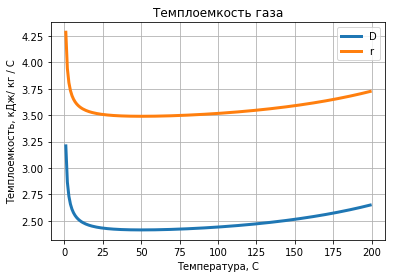

In [5]:
t_c_list = range(1, 200)
heat_capacity_list, heat_capacity_list2 = [], []
heat_capacity_list3, heat_capacity_list4 = [], []
p_bar = 25 
for i in t_c_list:
    heat_capacity_list.append(heat_capacity_gas(p_bar, i, gamma_gas))
    heat_capacity_list2.append(heat_capacity_gas(p_bar *10, i, gamma_gas))

# TODO переписать уравнение Махмуда для FIELD, надо чтоб сошлось
plt.plot(t_c_list, heat_capacity_list, linewidth=3)
plt.plot(t_c_list, heat_capacity_list2, linewidth=3)

show_example('Dr. Mahmood Moshfeghian','Темплоемкость газа', 
             'Температура, С', 'Темплоемкость, кДж/ кг / С')

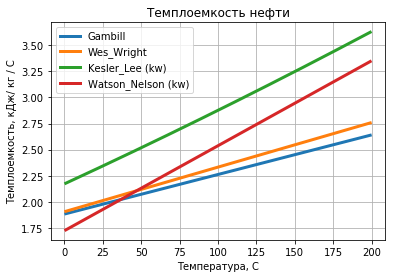

In [6]:
heat_capacity_oil_1, heat_capacity_oil_2, heat_capacity_oil_3 = [], [],[]
heat_capacity_oil_4, heat_capacity_oil_5 = [], []
for i in t_c_list:
    heat_capacity_oil_1.append(heat_capacity_oil_Gambill(gamma_oil, i))
    heat_capacity_oil_2.append(heat_capacity_oil_Wes_Wright(gamma_oil, i))
    heat_capacity_oil_3.append(heat_capacity_Kesler_Lee(gamma_oil, i, 10))
    heat_capacity_oil_4.append(heat_capacity_oil_Watson_Nelson(gamma_oil, i, 10))

plt.plot(t_c_list, heat_capacity_oil_1, linewidth=3)
plt.plot(t_c_list, heat_capacity_oil_2, linewidth=3)
plt.plot(t_c_list, heat_capacity_oil_3, linewidth=3)
plt.plot(t_c_list, heat_capacity_oil_4, linewidth=3)
labels = ('Gambill', 'Wes_Wright', 'Kesler_Lee (kw)', 'Watson_Nelson (kw)' )
show_example(labels,'Темплоемкость нефти', 
             'Температура, С', 'Темплоемкость, кДж/ кг / С')

In [7]:
fluid_Standing = PVT_fluids.FluidStanding()
fluid_Standing.calc(1,25)
mu_st = fluid_Standing.mu_oil_cP
import math
mo = 140.5 + 53.70 * math.log(mu_st,math.e) - 1.915 *  (math.log(mu_st,math.e))**2
print(mo)
mo = mo * 1000
api = uc.gamma_oil2api(gamma_oil)
mo = 6.084 / (api - 5.9) *1000
print(mo)
kw = 4.5573 * mo**0.15178*api**(-0.84573)
print(kw)

254.65226712665628
154.1228625712476
0.3886534673094762


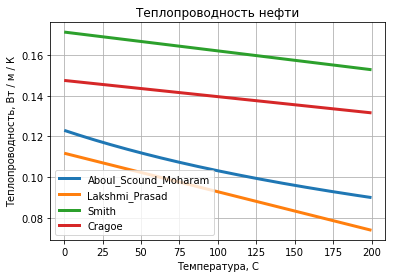

In [8]:
thermal_conductivity_oil_1, thermal_conductivity_oil_2, thermal_conductivity_oil_3 = [], [],[]
thermal_conductivity_oil_4, thermal_conductivity_oil_5 = [], []
for i in t_c_list:
    thermal_conductivity_oil_1.append(thermal_conductivity_Aboul_Scound_Moharam(gamma_oil, i))
    thermal_conductivity_oil_2.append(thermal_conductivity_Lakshmi_Prasad(200, i))
    thermal_conductivity_oil_3.append(thermal_conductivity_Smith(gamma_oil, i))
    thermal_conductivity_oil_4.append(thermal_conductivity_Cragoe(gamma_oil, i))
     
plt.plot(t_c_list, thermal_conductivity_oil_1, linewidth=3)
plt.plot(t_c_list, thermal_conductivity_oil_2, linewidth=3)
plt.plot(t_c_list, thermal_conductivity_oil_3, linewidth=3)
plt.plot(t_c_list, thermal_conductivity_oil_4, linewidth=3)
labels = ('Aboul_Scound_Moharam','Lakshmi_Prasad', 'Smith' , 'Cragoe')
show_example(labels,'Теплопроводность нефти', 
             'Температура, С', 'Теплопроводность, Вт / м / К')

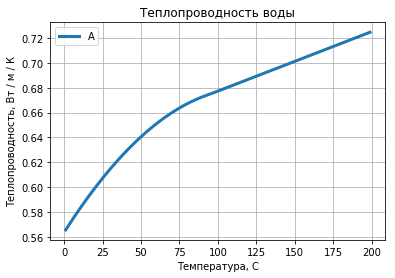

In [9]:
thermal_conductivity_water_1 = []
for i in t_c_list:
    thermal_conductivity_water_1.append(thermal_conductivity_water(i))
     
plt.plot(t_c_list, thermal_conductivity_water_1, linewidth=3)
labels = ('Aboul_Scound_Moharam')
show_example(labels,'Теплопроводность воды', 
             'Температура, С', 'Теплопроводность, Вт / м / К')

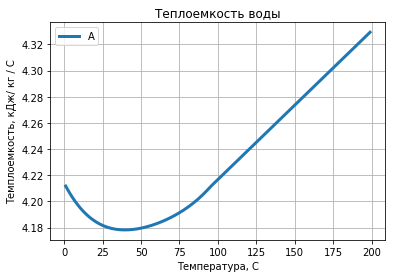

In [10]:
heat_capacity_water_1 = []
for i in t_c_list:
    heat_capacity_water_1.append(heat_capacity_water(i))
     
plt.plot(t_c_list, heat_capacity_water_1, linewidth=3)
labels = ('Aboul_Scound_Moharam')
show_example(labels,'Теплоемкость воды', 
             'Температура, С', 'Темплоемкость, кДж/ кг / С')

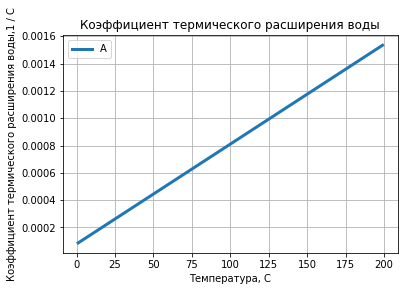

In [11]:
expansion_coefficient_water_1 = []
for i in t_c_list:
    expansion_coefficient_water_1.append(expansion_coefficient_water(i))
     
plt.plot(t_c_list, expansion_coefficient_water_1, linewidth=3)
labels = ('Aboul_Scound_Moharam')
show_example(labels,'Коэффициент термического расширения воды', 
             'Температура, С', 'Коэффициент термического расширения воды,1 / С')

In [12]:
thermal_conductivity_gas_methan(120)

0.047906451612903224